In [1]:
# comparison of PCA data with DG data
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

#are there any correlations between the Questionnaires and the D1-4 values?

In [3]:
df = pd.read_csv("Dime_allMoves_08_23.csv")

df.dtypes
df.head

<bound method NDFrame.head of      Move  subID        D1        D2        D3        D4  Fqgen  SelfRank
0       1    109  1.427618  2.922592 -3.213224  0.566367   0.35         1
1       1    193  0.297067 -0.364138  1.341651 -0.396019   0.45         1
2       1    265 -2.023743  1.678353  0.351403 -1.046148   0.15         1
3       1    289 -0.119704  2.011954  0.430030  1.825543   0.14         1
4       0    110 -0.861364 -0.536262  1.190110 -1.302700   0.15         1
..    ...    ...       ...       ...       ...       ...    ...       ...
487     1    323 -0.526856  2.611323  0.092029 -1.003291   0.49         3
488     1    359 -0.492658 -0.284157 -0.468744  0.701449   0.33         3
489     2    431 -0.348541  0.750456 -0.351995  0.558396   0.09         3
490     2    443 -2.035988  1.666913  0.228392  1.042174   0.14         3
491     2    455 -1.117870 -1.631447  0.844907 -0.079827   0.34         3

[492 rows x 8 columns]>

R-squared: -0.02885120736399993
Mean squared error: 0.026108259568783605


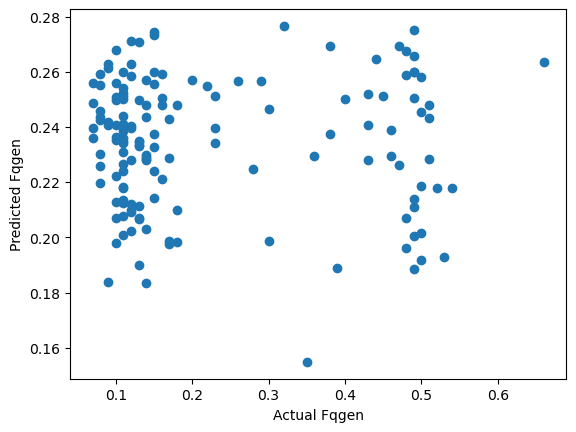

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv("Dime_allMoves_08_23.csv")

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['D1', 'D2', 'D3', 'D4', 'SelfRank']], df[['Fqgen']], test_size=0.3, random_state=42)

# Scale the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['D1', 'D2', 'D3', 'D4', 'SelfRank']] = scaler.fit_transform(X_train[['D1', 'D2', 'D3', 'D4', 'SelfRank']])
X_test[['D1', 'D2', 'D3', 'D4', 'SelfRank']] = scaler.transform(X_test[['D1', 'D2', 'D3', 'D4', 'SelfRank']])

# Fit a linear regression model on the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model using R-squared and mean squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared:', r2)
print('Mean squared error:', mse)

# Plot the predicted versus actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Fqgen')
plt.ylabel('Predicted Fqgen')
plt.show()

#An R-squared value of -0.0288 indicates that the model is performing poorly in explaining the variance in the target variable,
#  Fqgen. This means that the input variables (D1-D4 and SelfRank) are not strongly correlated with the frequency of generous choices.
#  A negative R-squared value indicates that the model is performing worse than the baseline model, which would simply predict the mean
#  of the target variable. The mean squared error (MSE) of 0.0261 indicates that, on average, the predictions of the model are off by about 
# 0.161. This may or may not be acceptable depending on the context of your study and the research question you are trying to answer.
#  However, given the low R-squared value, the model may not be suitable for making accurate predictions of Fqgen.

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X = df[['D1', 'D2', 'D3', 'D4']]
y = df['Fqgen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'Mean squared error: {mse:.4f}')



R-squared: -0.5183
Mean squared error: 0.0397


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

# Load data into a pandas DataFrame
df = pd.read_csv("Dime_allMoves_08_23.csv")

# Create subsets of the data for each self rank level
subsets = {}
for level in range(1, 5):
    subsets[level] = df[df['SelfRank'] == level]

# Train and test SVM regression models for each self rank level
for level in range(1, 5):
    X = subsets[level][['D1', 'D2', 'D3', 'D4']]
    y = subsets[level]['Fqgen']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the SVM regression model
    svm = SVR(kernel='linear', C=1, epsilon=0.1)
    svm.fit(X_train, y_train)

    # Make predictions on the test set and evaluate model performance
    y_pred = svm.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Results for SelfRank level {level}")
    print(f"R-squared: {r2}")
    print(f"Mean squared error: {mse}\n")


Results for SelfRank level 1
R-squared: -0.02351346006971644
Mean squared error: 0.02184623220005555

Results for SelfRank level 2
R-squared: -0.0034623814624179516
Mean squared error: 0.02326890123199409

Results for SelfRank level 3
R-squared: 0.008398233867551341
Mean squared error: 0.02406960768190259



ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Load the data
df = pd.read_csv("Dime_allMoves_08_23.csv")

# Split the data into four subsets based on SelfRank
subsets = {}
for level in range(1, 5):
    subsets[level] = df[df['SelfRank'] == level]

# Train and test separate SVM models for each subset
for level in range(1, 5):
    # Split the data into training and testing sets
    X = subsets[level][['D1', 'D2', 'D3', 'D4']]
    y = subsets[level]['Fqgen']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the SVM regression model
    svm = SVR(kernel='rbf')
    svm.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm.predict(X_test)

    # Evaluate the model's performance
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f'SelfRank = {level}')
    print(f'R-squared: {r2:.4f}')
    print(f'Mean squared error: {mse:.4f}')


#The main difference between the two codes is that they use different SVM kernels.
#  The first code uses the "linear" kernel while the second code uses the "rbf" kernel.
#  The "linear" kernel is a linear function that is commonly used for linear regression problems,
#  while the "rbf" kernel is a radial basis function that is more suited for nonlinear regression problems.
# Additionally, the first code trains and tests separate SVM models for each subset of data based on SelfRank,
#  while the second code trains and tests a single SVM model for each SelfRank level. This means that the first
#  code may be more tailored to the specific characteristics of each subset, while the second code is more general 
# and may have a better overall performance.


SelfRank = 1
R-squared: -0.0471
Mean squared error: 0.0224
SelfRank = 2
R-squared: -0.1710
Mean squared error: 0.0272
SelfRank = 3
R-squared: 0.1111
Mean squared error: 0.0216


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [12]:
import pandas as pd
from sklearn.decomposition import PCA

# read in the data
df = pd.read_csv("Dime_allMoves_08_23.csv")

# subset the continuous variables
X = df[['D1', 'D2', 'D3', 'D4']]

# standardize the variables
X = (X - X.mean()) / X.std()

# perform PCA with two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# add the PCA components to the original data frame
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# print the first few rows of the updated data frame
print(df.head())



# Perform PCA on the continuous variables (D1-D4)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[['D1', 'D2', 'D3', 'D4']])

# Add the PCA components to the original dataframe
df['PC1'] = pca_components[:, 0]
df['PC2'] = pca_components[:, 1]

# Save the results to a new CSV file
df.to_csv('Dime_allMoves_PCA.csv', index=False)



   Move  subID        D1        D2        D3        D4  Fqgen  SelfRank  \
0     1    109  1.427618  2.922592 -3.213224  0.566367   0.35         1   
1     1    193  0.297067 -0.364138  1.341651 -0.396019   0.45         1   
2     1    265 -2.023743  1.678353  0.351403 -1.046148   0.15         1   
3     1    289 -0.119704  2.011954  0.430030  1.825543   0.14         1   
4     0    110 -0.861364 -0.536262  1.190110 -1.302700   0.15         1   

        PC1       PC2  
0  1.693001  3.088253  
1 -0.518503 -0.824939  
2 -1.672043  0.901807  
3  0.510050  0.740758  
4 -1.382499 -0.735251  


R^2: -0.05087899490686443


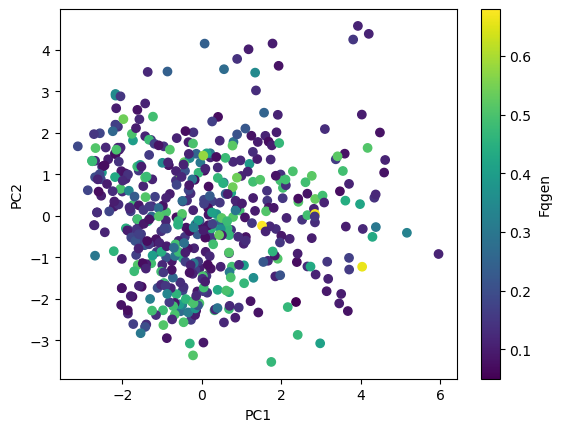

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Read the data
df = pd.read_csv("Dime_allMoves_PCA.csv")

# Split the data into training and testing sets
X = df[['PC1', 'PC2']]
y = df['Fqgen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM regression model
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the coefficient of determination (R^2) on the test set
r2 = regressor.score(X_test, y_test)
print(f"R^2: {r2}")

import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot of PC1 and PC2 against Fqgen
plt.scatter(df["PC1"], df["PC2"], c=df["Fqgen"])
plt.colorbar(label="Fqgen")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


R^2: -0.05087899490686443


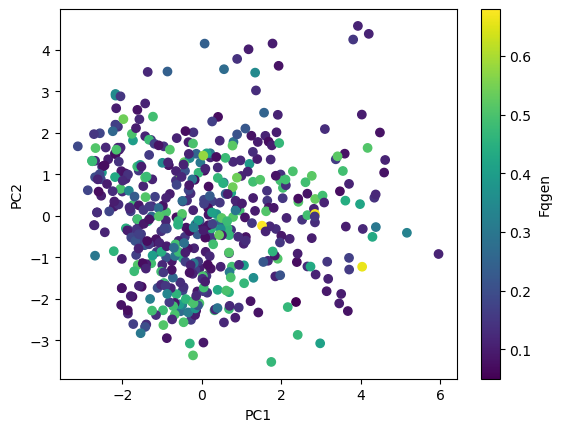

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("Dime_allMoves_PCA.csv")

# Split the data into training and testing sets
X = df[['PC1', 'PC2']]
y = df['Fqgen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM regression model
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the coefficient of determination (R^2) on the test set
r2 = regressor.score(X_test, y_test)
print(f"R^2: {r2}")

# Create a scatter plot of PC1 and PC2 against Fqgen
plt.scatter(df["PC1"], df["PC2"], c=df["Fqgen"])
plt.colorbar(label="Fqgen")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Read the data
df = pd.read_csv("Dime_allMoves_PCA.csv")

# Split the data into training and testing sets
X = df[['PC1', 'PC2']]
y = df['Fqgen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM regression model
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the mean squared error and r2 score on the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R^2 score: {r2}")


Mean squared error: 0.027498675862869595
R^2 score: -0.05087899490686443


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Read the data
df = pd.read_csv("Dime_allMoves_PCA.csv")

# Split the data into Move 1 and Move 0 subsets
df_move1 = df[df["Move"] == 1]
df_move0 = df[df["Move"] == 0]

# Perform SVM regression on Move 1 subset
X1 = df_move1[['PC1', 'PC2']]
y1 = df_move1['Fqgen']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

regressor1 = SVR(kernel='linear')
regressor1.fit(X1_train, y1_train)

y1_pred = regressor1.predict(X1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

print("Move 1:")
print(f"MSE: {mse1}")
print(f"R^2: {r2_1}")

# Perform SVM regression on Move 0 subset
X0 = df_move0[['PC1', 'PC2']]
y0 = df_move0['Fqgen']
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.2, random_state=42)

regressor0 = SVR(kernel='linear')
regressor0.fit(X0_train, y0_train)

y0_pred = regressor0.predict(X0_test)

mse0 = mean_squared_error(y0_test, y0_pred)
r2_0 = r2_score(y0_test, y0_pred)

print("Move 0:")
print(f"MSE: {mse0}")
print(f"R^2: {r2_0}")


Move 1:
MSE: 0.02613269084860432
R^2: -0.015365812135654133
Move 0:
MSE: 0.025930624390282146
R^2: -0.00867390048370531


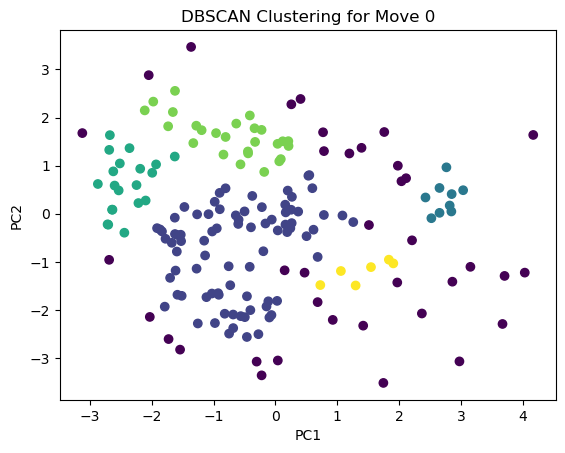

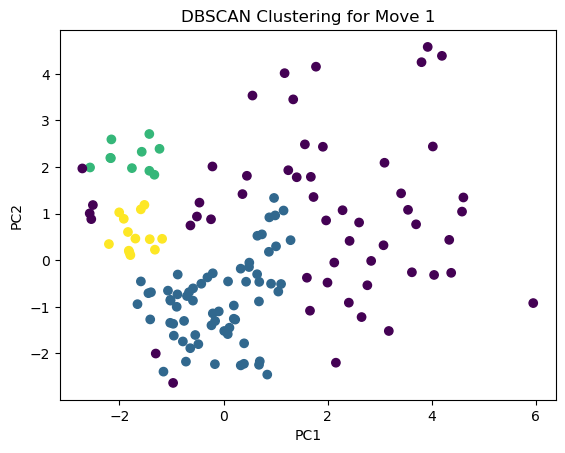

In [17]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv("Dime_allMoves_PCA.csv")

# Separate the data into two subsets based on the Move column
df_move_0 = df[df["Move"] == 0]
df_move_1 = df[df["Move"] == 1]

# Define the columns to be used for clustering
cols = ["PC1", "PC2"]

# Create a DBSCAN object and fit the model for Move 0
dbscan_0 = DBSCAN(eps=0.5, min_samples=5)
clusters_0 = dbscan_0.fit_predict(df_move_0[cols])

# Create a scatter plot of the clusters for Move 0
plt.scatter(df_move_0[cols[0]], df_move_0[cols[1]], c=clusters_0)
plt.title("DBSCAN Clustering for Move 0")
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.show()

# Create a DBSCAN object and fit the model for Move 1
dbscan_1 = DBSCAN(eps=0.5, min_samples=5)
clusters_1 = dbscan_1.fit_predict(df_move_1[cols])

# Create a scatter plot of the clusters for Move 1
plt.scatter(df_move_1[cols[0]], df_move_1[cols[1]], c=clusters_1)
plt.title("DBSCAN Clustering for Move 1")
plt.xlabel(cols[0])
plt.ylabel(cols[1])
plt.show()


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Select only D1 to D4 for clustering
X = df[['D1', 'D2', 'D3', 'D4']].values

# Determine the optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = np.argmax(silhouette_scores) + 2  # Add 2 to start counting from 2 clusters

# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

# Add the cluster labels to the original dataframe
df['Cluster'] = labels

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_n_clusters)

# Print the silhouette score of the clustering
print("Silhouette score:", silhouette_score(X, labels))


Optimal number of clusters: 2
Silhouette score: 0.28093238463350095


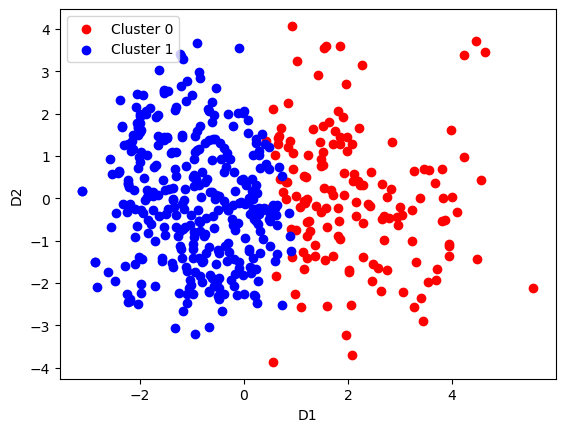

In [22]:
import matplotlib.pyplot as plt

# Create a list of colors to use for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'gray', 'cyan', 'magenta', 'yellow']

# Plot the data points, coloring each point according to its cluster label
for i in range(optimal_n_clusters):
    plt.scatter(X[labels==i,0], X[labels==i,1], c=colors[i], label='Cluster {}'.format(i))

# Add axis labels and a legend
plt.xlabel('D1')
plt.ylabel('D2')
plt.legend()
plt.show()


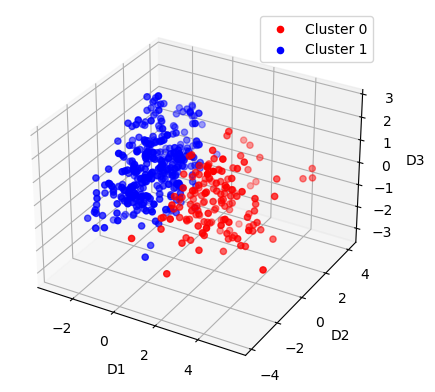

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points, coloring each point according to its cluster label
for i in range(optimal_n_clusters):
    ax.scatter(X[labels==i,0], X[labels==i,1], X[labels==i,2], c=colors[i], label='Cluster {}'.format(i))

# Add axis labels and a legend
ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
plt.legend()
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data
df = pd.read_csv("Dime_allMoves_08_23.csv")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['D1', 'D2']], df['Fqgen'], test_size=0.2, random_state=42)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the performance of the model
r2_score = model.score(X_test, y_test)
print("R^2 score:", r2_score)


R^2 score: -0.03059405457291553
